In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import butter, lfilter, freqz, detrend
from scipy.optimize import curve_fit
from sklearn import linear_model
from scipy import stats

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('notebook')

In [5]:
data_all = pd.DataFrame(columns=['log(concentration [mmol])', 'SNR', 'gain', 'power'])
mean_all = pd.DataFrame(columns=['log(concentration [mmol])', 'SNR', 'std', 'gain', 'power'])

powers = [0.065, 0.13, 0.26]
gains = [0.3, 0.4, 0.5]
concentrations = [1, 0.1, 0.01, 0.001, 0.0001]

for p in powers:
    for g in gains:

        ref_df = pd.read_csv('/home/julia/data/calcium_bold/calibration/h20_%smw_%sv.csv'
                             % (str(p).replace('.', ''), str(g).replace('.', '')))
        ref_data = ref_df['signal[V]']
        ref = np.mean(ref_data)    
        #print(p,g,ref)

        for c in concentrations:
            df = pd.read_csv('/home/julia/data/calcium_bold/calibration/%smmol_%smw_%sv.csv' 
                             % (str(c).replace('.', ''), 
                                str(p).replace('.', ''),
                                str(g).replace('.', '')))

            data = {'log(concentration [mmol])' : np.log(df['signal[V]'].shape[0]*[c]),
                    'SNR' : np.array(df['signal[V]'])/ref,
                    'gain' : df['signal[V]'].shape[0]*[g],
                    'power' : df['signal[V]'].shape[0]*[p]}

            mean = {'log(concentration [mmol])' : np.log([c]),
                    'SNR' : np.mean(np.array(df['signal[V]']))/ref,
                    'std' : np.std(np.array(df['signal[V]']/ref)),
                    'gain' : g,
                    'power' : p}

            data_all = data_all.append(pd.DataFrame(data))
            mean_all = mean_all.append(pd.DataFrame(mean))

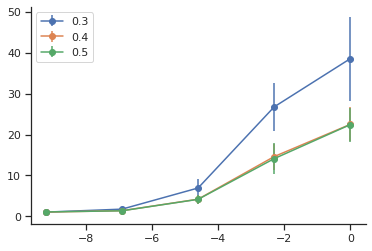

In [83]:
mx=mean_all.loc[mean_all['power']==0.26]
fig, ax = plt.subplots()
data=mx.loc[mx['gain']==0.3]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.3')
data=mx.loc[mx['gain']==0.4]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.4')
data=mx.loc[mx['gain']==0.5]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.5')
sns.despine()
plt.legend()

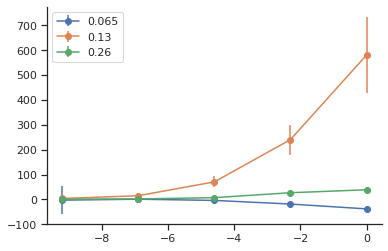

In [87]:
mx=mean_all.loc[mean_all['gain']==0.]
fig, ax = plt.subplots()
data=mx.loc[mx['power']==0.065]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.065')
data=mx.loc[mx['power']==0.13]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.13')
data=mx.loc[mx['power']==0.26]
ax.errorbar(data['log(concentration [mmol])'], data['SNR'],yerr=data['std'], fmt='-o', label='0.26')
sns.despine()
plt.legend()

KeyboardInterrupt: 

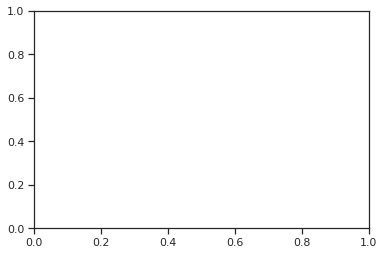

In [10]:
sns.kdeplot(data=data_all['log(concentration [mmol])'], data2=data_all['SNR'])

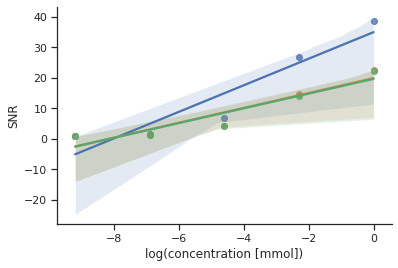

In [12]:
mx=mean_all.loc[mean_all['power']==0.26]
sns.regplot(x='log(concentration [mmol])', y='SNR',data=mx.loc[mx['gain']==0.3], 
            truncate=True, fit_reg=True)
sns.regplot(x='log(concentration [mmol])', y='SNR',data=mx.loc[mx['gain']==0.4], 
            truncate=True, fit_reg=True)
sns.regplot(x='log(concentration [mmol])', y='SNR',data=mx.loc[mx['gain']==0.5], 
            truncate=True, fit_reg=True)
sns.despine()

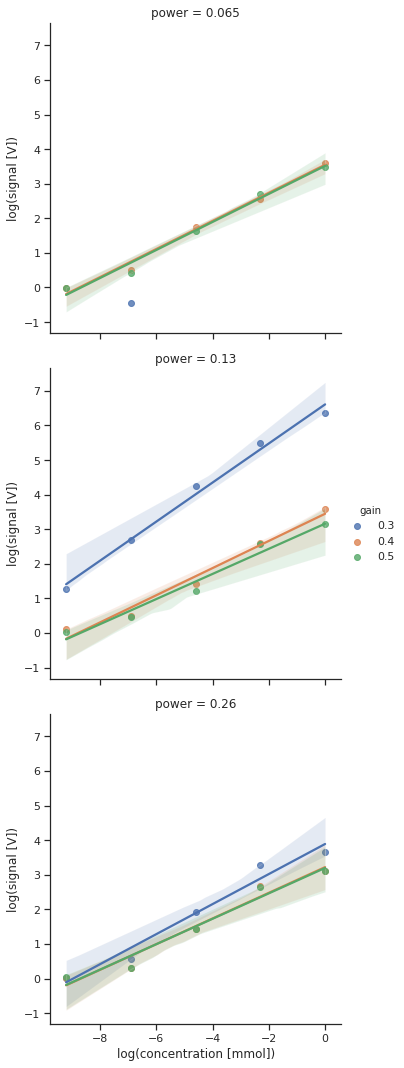

In [6]:
sns.lmplot(x='log(concentration [mmol])', y='log(signal [V])', hue='gain', row='power',
           data=mean_all, fit_reg=True, truncate=True,)

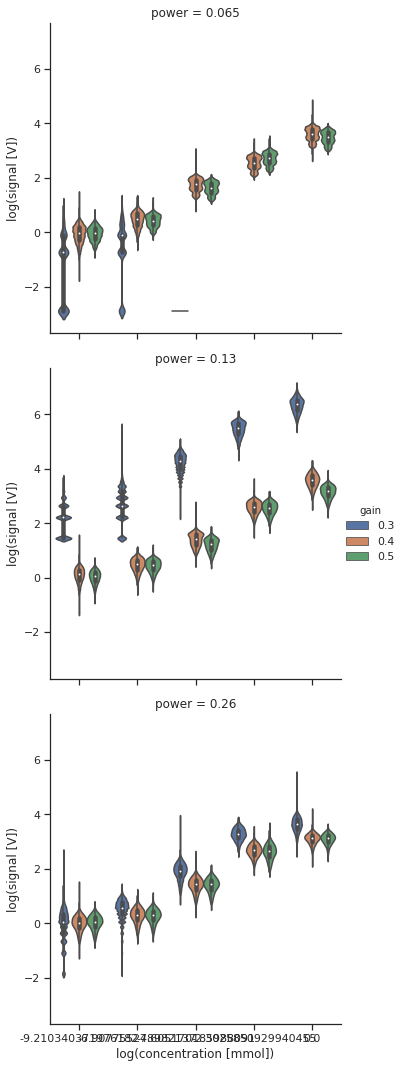

In [7]:
sns.catplot(x='log(concentration [mmol])', y='log(signal [V])', hue='gain', 
            row='power', data=data_all, kind='violin')

In [109]:
data_all = pd.DataFrame(columns=['log(concentration [mmol])', 'log(signal [V])', 'power'])
mean_all = pd.DataFrame(columns=['log(concentration [mmol])', 'log(signal [V])', 'power'])

powers = [0.065, 0.13, 0.26]
concentrations = [0.00001,0.000001,0.0000001,0.00000001]

for p in powers:
    ref_df = pd.read_csv('/home/julia/data/calcium_bold/calibration/h20_%smw_1v.csv'
                         % (str(p).replace('.', '')))
    ref_data = ref_df['signal[V]']
    ref = np.mean(ref_data)    

    for c in concentrations:
        df = pd.read_csv('/home/julia/data/calcium_bold/calibration/%s_%smw_1v.csv' 
                         % (str(np.format_float_positional(c)).replace('.', ''), 
                            str(p).replace('.', ''),))

        data = {'log(concentration [mmol])' : np.log(df['signal[V]'].shape[0]*[c]),
                'log(signal [V])' : np.log(np.array(df['signal[V]'])/ref),
                'power' : df['signal[V]'].shape[0]*[p]}

        mean = {'log(concentration [mmol])' : np.log([c]),
                'log(signal [V])' : np.log(np.mean(np.array(df['signal[V]']))/ref),
                'power' : p}

        data_all = data_all.append(pd.DataFrame(data))
        mean_all = mean_all.append(pd.DataFrame(mean))

<IPython.core.display.Javascript object>


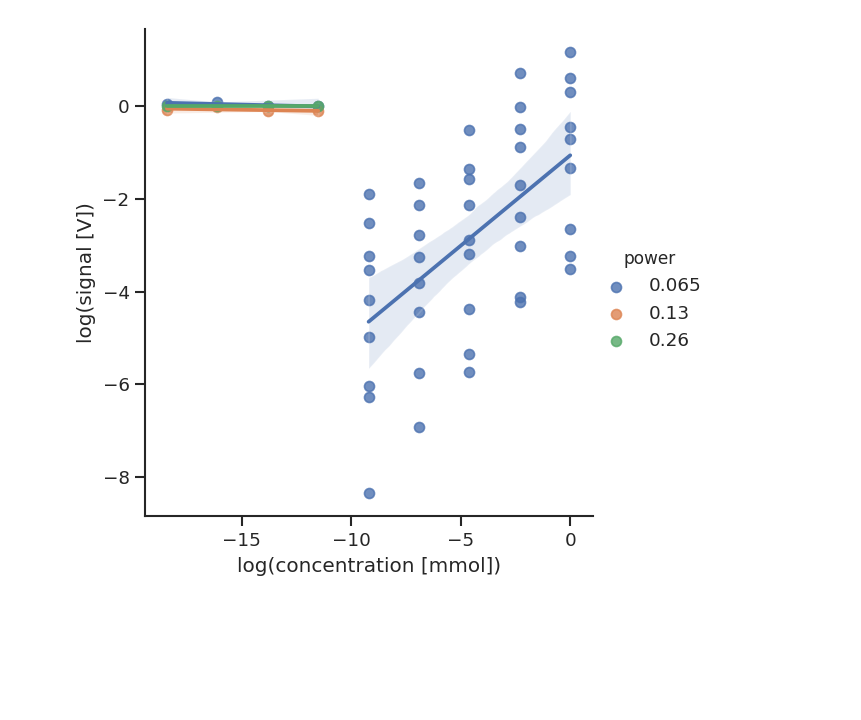

In [110]:
sns.lmplot(x='log(concentration [mmol])', y='log(signal [V])', hue='power',
           data=mean_all, fit_reg=True, truncate=True,)